<a href="https://colab.research.google.com/github/HuynhQuocDan/Artificial-Intelligence/blob/main/week_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

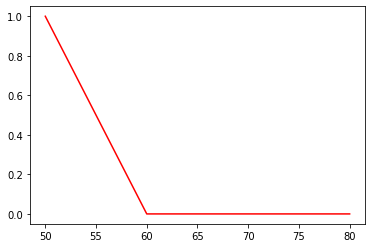

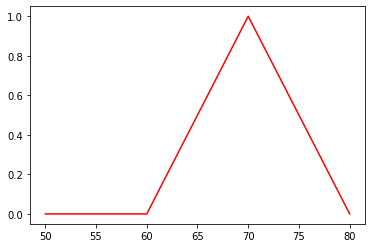

In [12]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x=np.arange(50,81,1)
slow=fuzz.trimf(x,[50,50,60])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot
slow=fuzz.trimf(x,[60,70,80])
plt.figure()
plt.plot(x,slow,'r',linewidth=1.5,label='slow')
plt.plot

In [13]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as control

In [14]:
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')

NameError: ignored

21.499999999999996


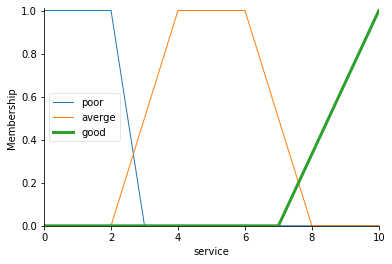

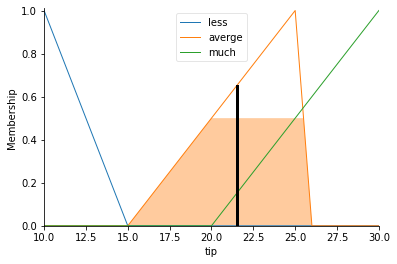

In [38]:
#tinh tien tip
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food = ctrl.Antecedent(np.arange(0,11,1),'food')
service = ctrl.Antecedent(np.arange(0,11,1),'service')
tip = ctrl.Consequent(np.arange(10,31,1),'tip')
food['poor'] = fuzz.trimf(food.universe,[0,0,2])
# food.universe la ham de truyen gia tri tu food
food['averge'] = fuzz.trimf(food.universe,[1,4,9])
food['good'] = fuzz.trimf(food.universe,[8,10,10])
#food['good'].view()
#tip.view() dung de hien thi len do thi tip

#fuzz.trapmf(x,a,b,c,d) ve hinh thang
#fuzz.trimf(x,a,b,c) ve hinh tam giac
#fuzzi.gaussmf(x,a,b) ve hinh gauss a la tam, b la phuong sai

service['poor'] = fuzz.trapmf(service.universe,[0,0,2,3])
service['averge'] = fuzz.trapmf(service.universe,[2,4,6,8])
service['good'] = fuzz.trimf(service.universe,[7,10,10])
service['good'].view()

tip['less'] = fuzz.trimf(tip.universe,[10,10,15])
tip['averge'] = fuzz.trimf(tip.universe,[15,25,26])
tip['much'] = fuzz.trimf(tip.universe,[20,30,30])
#tip['much'].view()
#tao cac rule
rule1 = ctrl.Rule(food['poor'] & service['poor'],tip['less'])
rule2 = ctrl.Rule(food['poor'] & service['averge'],tip['averge'])
rule3 = ctrl.Rule(food['poor'] & service['good'],tip['averge'])
rule4 = ctrl.Rule(food['averge'] & service['poor'],tip['averge'])
rule5 = ctrl.Rule(food['good'] & service['poor'],tip['averge'])
rule6 = ctrl.Rule(food['averge'] & service['averge'],tip['averge'])
rule7 = ctrl.Rule(food['averge'] & service['good'],tip['averge'])
rule8 = ctrl.Rule(food['good'] & service['averge'],tip['averge'])
rule9 = ctrl.Rule(food['good'] & service['good'],tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['food']=6.5
tipping.input['service']=9.8
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

22.650298317048552


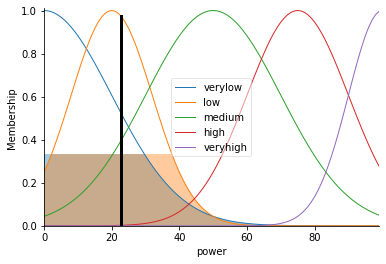

In [53]:
#Tinh cong suat noi com dien
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
#thoi gian nau: time
time = ctrl.Antecedent(np.arange(10,305,5),'time')
#luong gao: rice
rice = ctrl.Antecedent(np.arange(100,2000,100),'rice')
#Cong suat: power
power = ctrl.Consequent(np.arange(0,100,1),'power')

time['veryfast'] = fuzz.trimf(time.universe,[0,5,15])
time['fast'] = fuzz.trapmf(time.universe,[10,15,18,20])
time['medium'] = fuzz.trapmf(time.universe,[20,22,27,30])
time['slow'] = fuzz.trapmf(time.universe,[25,40,45,50])
time['veryslow'] = fuzz.trimf(time.universe,[45,60,300])
#time.view()

rice['soless'] = fuzz.gaussmf(rice.universe,[100],200)
rice['less'] = fuzz.gaussmf(rice.universe,[300],250)
rice['medium'] = fuzz.gaussmf(rice.universe,[700],400)
rice['much'] = fuzz.gaussmf(rice.universe,[1200],500)
rice['somuch'] = fuzz.gaussmf(rice.universe,[2000],350)
#rice.view()

power['verylow'] = fuzz.gaussmf(power.universe,[0],20)
power['low'] = fuzz.gaussmf(power.universe,[20],12)
power['medium'] = fuzz.gaussmf(power.universe,[50],20)
power['high'] = fuzz.gaussmf(power.universe,[75],15)
power['veryhigh'] = fuzz.gaussmf(power.universe,[100],10)
#power.view()

rule1 = ctrl.Rule(time['veryfast'] & rice['soless'],power['low'])
rule2 = ctrl.Rule(time['veryfast'] & rice['less'],power['medium'])
rule3 = ctrl.Rule(time['veryfast'] & rice['medium'],power['high'])
rule4 = ctrl.Rule(time['veryfast'] & rice['much'],power['high'])
rule5 = ctrl.Rule(time['veryfast'] & rice['somuch'],power['veryhigh'])
rule6 = ctrl.Rule(time['fast'] & rice['soless'],power['verylow'])
rule7 = ctrl.Rule(time['fast'] & rice['less'],power['low'])
rule8 = ctrl.Rule(time['fast'] & rice['medium'],power['low'])
rule9 = ctrl.Rule(time['fast'] & rice['much'],power['medium'])
rule10 = ctrl.Rule(time['fast'] & rice['somuch'],power['medium'])
rule11 = ctrl.Rule(time['medium'] & rice['soless'],power['verylow'])
rule12 = ctrl.Rule(time['medium'] & rice['less'],power['verylow'])
rule13 = ctrl.Rule(time['medium'] & rice['medium'],power['low'])
rule14 = ctrl.Rule(time['medium'] & rice['much'],power['medium'])
rule15 = ctrl.Rule(time['medium'] & rice['somuch'],power['medium'])
rule16 = ctrl.Rule(time['slow'] & rice['soless'],power['verylow'])
rule17 = ctrl.Rule(time['slow'] & rice['less'],power['verylow'])
rule18 = ctrl.Rule(time['slow'] & rice['medium'],power['low'])
rule19= ctrl.Rule(time['slow'] & rice['much'],power['low'])
rule20 = ctrl.Rule(time['slow'] & rice['somuch'],power['medium'])
rule21 = ctrl.Rule(time['veryslow'] & rice['soless'],power['verylow'])
rule22 = ctrl.Rule(time['veryslow'] & rice['less'],power['verylow'])
rule23 = ctrl.Rule(time['veryslow'] & rice['medium'],power['low'])
rule24= ctrl.Rule(time['veryslow'] & rice['much'],power['low'])
rule25 = ctrl.Rule(time['veryslow'] & rice['somuch'],power['medium'])

tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['time']=50
tipping.input['rice']=500
tipping.compute()
print(tipping.output['power'])
power.view(sim=tipping)